In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from wscoop import Cooperante

iris = datasets.load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.5)
model = LogisticRegression()
model.fit(X_train, y_train)

# make prediction (None, class_num)
y_pred_proba = model.predict_proba(X_test)

# make penalty array
penalty_array = np.array([[0, 1, 3],
                         [1, 0, 1],
                         [5, 1, 0]])

,score over X %,accuracy_score(label0),accuracy_score(label1),accuracy_score(label2),recall_score(label0),recall_score(label1),recall_score(label2)
0,90,0,0,0,0,0,0
1,95,0,0,0,0,10,0
2,99,12,12,12,0,12,8


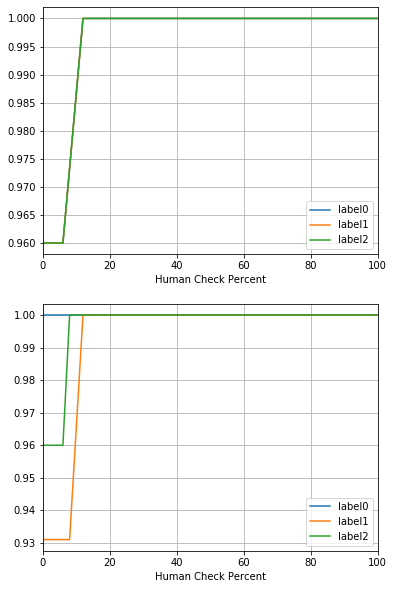

In [6]:
coop = Cooperante(penalty_array)

# coop_pred:(None,)
# expected_rink:(None,)
coop_pred, expected_risk = coop.fit(y_pred_proba)

# Visualize
coop.plot_eval(y_test, metrics=['accuracy_score', "recall_score"], samplong_rate=2)

#90, 95, 99% value
coop.check_rate_df